# Key Steps:

- Charges are right-skewed → Log transformation improves normality.
- which status has the highest correlation with charges, what is the correlation score?
- BMI and age show positive or negative correlations?

### Task: Visualize Cost Distribution Skewness
Create a histogram with KDE to show medical cost skewness:  
```python
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Medical Cost Distribution (Right-Skewed)')
plt.show()
```
Observe the long right tail indicating higher-cost outliers.


Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


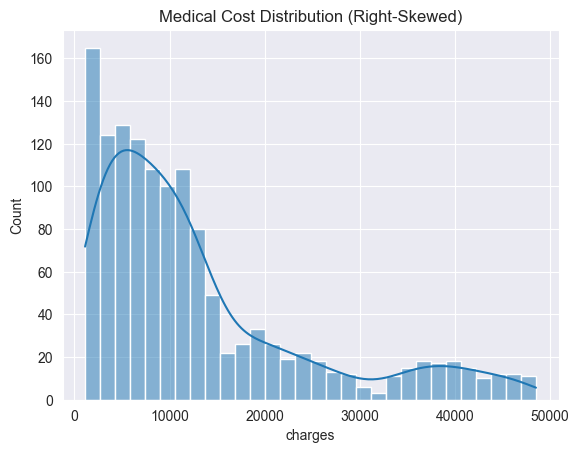

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind
# Load data
df = pd.read_csv("C:/Users/yoooE/Desktop/insurance.csv")

# Check missing values and data types
print("Missing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

# 1. Drop rows with any missing values``
df = df.dropna()

# 2. Fill missing numerical values with mean or median
# df['column_name'] = df['column_name'].fillna(df['column_name'].mean())

# 3. Fill missing categorical values with mode
# df['column_name'] = df['column_name'].fillna(df['column_name'].mode()[0])

# 4. Fill all missing values with a constant
# df = df.fillna(0)

#Handle outliers in 'charges' (top 1%) -remove values above 99th percentile
percentile_99 = df['charges'].quantile(0.99)

df_filted = df[df['charges']<= percentile_99]
#print(df_filted)
#it's right-skewed since mean > median
sns.histplot(df_filted['charges'], kde=True, bins=30)
plt.title('Medical Cost Distribution (Right-Skewed)')
plt.show()

### Log Transformation
Applies natural log to normalize right-skewed cost data:
```python
df['log_charges'] = np.log1p(df['charges'])
```
Why use log1p?

- Handles zero values safely (log(1+x) transformation)

- Compresses extreme values to reduce skew

- Makes data more suitable for statistical tests

In [ ]:
#next-step normalize using log method
df_filted['log_charges'] = np.log1p(df_filted['charges'])
sns.histplot(df_filted['log_charges'], kde=True, bins=30)
plt.title('Medical Cost Distribution after Log Transform')
plt.show()

### Task: Create Correlation Heatmap
Generate a heatmap to visualize relationships between numerical variables:
```python
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
```
Warm colors (red) = Positive correlation

Cool colors (blue) = Negative correlation

Values show correlation strength (-1 to 1)



In [ ]:
sns.heatmap(df_filted.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Filtered Charges)", fontsize=14)
plt.tight_layout()
plt.show()

Other Optional Exploration tasks
- Explore relationships between categorical features and charges (e.g., boxplots by smoker status, region, or sex)  
- Analyze outliers and their impact on cost distribution  
- Visualize pairwise relationships using pairplots  
- Investigate interaction effects (e.g., age vs. BMI vs. charges)  
- Summarize descriptive statistics for all features  
- Compare distributions of charges across different groups (e.g., smokers vs. non-smokers)  
- Check for multicollinearity among predictors